# Statistical Inference
## Lesson overview:
In this lesson we will go over statistical inference. We will start with one-sample tests (both for means and proportions), as well as calculating confidence intervals. Then, we will move to two-sample and paired tests. Lastly, we will also guide you to perform one-way ANOVA test, simple linear regression and multiple linear regression by using statsmodels.formula.api.

By the end of this session you will be able to:
* Use statsmodels.stats.proportion, scipy.stats, statsmodels.api and statsmodels.formula.api to perform statistical inference: one-sample tests, two-sample tests, paired data tests, one-way anova, SLR and MLR.
* Practice creating plots for checking conditions.

In [3]:
# Import libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, confint_proportions_2indep
from scipy.stats import t, probplot, ttest_1samp, ttest_ind, ttest_rel, sem
from statsmodels.api import qqplot, stats
from statsmodels.formula.api import ols
from math import sqrt

# Read csv file
coasters = pd.read_csv("Coasters_2015.csv")

In [1]:
# Take a look at the data by using head()


In [2]:
# Take a look at the data by using describe()


### One-sample proportion z-test

We will begin by performing a one-sample z-test. Recall that the purpose of this parametric test is to determine if there is a significant difference between the sample proportion and the hypothesized population proportion. Let's say we were interested in learning the true propotion of steel roller coasters in this dataset. Let's begin by finding the proportion of steel roller coaster of our data.

In [6]:
# Count how many rollercoasters have a steel track v/s how many have a wood track
print(coasters["Track"].value_counts(normalize = True))

Steel    0.879668
Wood     0.120332
Name: Track, dtype: float64


Great! The proportion of steel roller coasters is ~ 0.88.

However, a rollercoasters' expert suggests that during 2022 the proportion of steel roller coasters hasn't changed. Her study shows that 320 out of 355 roller coasters have a steel track.

* $H_0$: $p̂$ = 0.88 ; the proportion of steel roller coasters in 2022 is 0.88
* $H_A$: $p̂$ ≠ 0.88 ; the proportion of steel roller coasters in 2022 is different from 0.88

**Check conditions:**
* n < 10% of total population: we can assume that 355 rollercoasters is less than 10% of all roller coasters in the world.
* randomness: we can assume that we were given a random sample of roller coasters.
* successes vs failures : 355 * 0.88 = 312, 241 * 0.12 = 43. Both values are greater than 10.


To test our null hypothesis, we will make use of proportions_ztest which we imported at the beginning of the notebook.

**Structure:**
* z_test, p_value = proportions_ztest(count = #, nobs = #, value = #, alternative = "one_or_two")

**Arguments**
* count = # ; number of successes if Null Hypothesis is True. (total observed * hypothesized proportion)
* nobs = # ; size of observed sample
* value = # ; observed proportion
* alternative = "nameOfAlternative" ; Type of test("two-sided" or "one-sided")

**Note**: In this case, observed corresponds to what the roller coasters expert observed.

In [ ]:
# Store z_test and p_value
z_test , p_value = proportions_ztest(count =  , nobs = , value = , alternative = "two-sided")

# Print results
print("The z test values is: ", z_test, ". The p-value is: ", p_value)

Since the p-value is greater than 0.05 we fail to reject the null hypothesis. We do not have enough evidence to say that the proportion of steel roller coasters in 2022 has changed sinced 2015.

### Confidence Interval for proportions

Now let's calculate our confidence interval for steel track proportion for the true population **using our 2015 data** (212 steel roller coasters/241 roller coasters in total). In order to do so, we will use proportion_confint which we imported at the beginning of the notebook.

**Structure:**
* conf_prop = proportion_confint(count = #, nobs = #, alpha = #)

**Arguments:**
* count = # ; number of successes
* nobs = # ; size of sample
* alpha = # ; the desired significance level (1 - confidence interval from 0 to 1)

**Check conditions:**
* n < 10% of total population: we can assume that 241 rollercoasters is less than 10% of all rollercoasters in the world.
* randomness: we can assume that we were given a random sample of rollercoasters.
* successes vs failures : 241 * 0.88 = 212, 241 * 0.12 = 29. Both values are greater than 10.

In [ ]:
# Calculate confidence interval and store in conf_prop
conf_prop = proportion_confint(count = , nobs = , alpha = )

# Print confidence interval
print()

We are 95% confident that between 83% and 92% of the roller coasters in the world have a steel track.

## Two-Sample z-Test

If we wanted to test the difference between two proportions, we might want to conduct a two-sample z-test. A two-proportion z-test allows us to find the true difference between two proportions for two separate groups. In our example, we will use the titanic dataset to determine if there is a significant difference in the proportion of people who survived depending on their gender. 

$H_0$: $p_1$ - $p_2$ = 0

$H_A$: $p_1$ ≠ $p_2$

Let's begin by familiarizing ourselves with this new dataset, which gives us the information of ~2200 passengers. Originally, the Titanic had 2400 passengers and crew on board so we will test for its true population.

In [ ]:
# Import data
titanic = pd.read_csv("titanic_2020.txt", sep = "\t")

# Take a look at the data

Before completing our two-proportion z-test, let's remember to check conditions. Recall that in this case, we must check the randomization condition, independent groups assumption, and the success/failure condition. Since we are working a dataset that describes the individuals on the titanic ship, we can say that it likely meets all conditions and proceed with caution. Let's move onto look at a contingency table, which will inform us of the proportions that we will need to put to the test. Remember that we learned how to make contingency tables in our last lesson.

In [ ]:
# Make a contingency table comparing Gender and Survived with totals
pd.crosstab(titanic["Gender"], titanic["Survived"], margins = True)

Now that we have made our contingency table, we know what values for our proportions that we will need to test. We will use the function *proportions_ztest( )* from the statsmodels.stats.proportion library. This function requires two lists of equal length that contain the values from our contingency table. Since we are trying to determine if there is a significant difference in the proportions of people who survived depending on their gender, we will create two lists that store the values of people who surived per gender and then the total amount of people per gender.

In [11]:
# Create a list of the amount of people who survived
count_survived = [359, 353]
total_gender = [489, 1719]
stat, p = proportions_ztest(count_survived, total_gender)

In [12]:
# Display the results
print("p-values:", p)
print("t-test:", stat)

p-values: 5.64463792626908e-108
t-test: 22.073797112540156


We can instruct Python to determine for us whether or not the P Value for our t-test is small enough to reject the null hypothesis using an if-else statement. Let's try it out!

In [13]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


After performing this two-sample z-test and obtaining a p-value of approximately 5.64e-108, we will reject the null hypothesis that the proportion of people who survived depending on their gender is equal. Thus, gender is likely an important variable in understanding the breakdown of people who survived the titanic shipwreck.

## Two-Proportion z-interval

Now let's calculate the confidence interval for the difference between the proportion of females and males that survived in the Titanic.

$H_0$: $p_1$ - $p_2$ = 0

$H_A$: $p_1$ - $p_2$ ≠ 0

In [14]:
# Let's recall our contigency table
pd.crosstab(titanic["Gender"], titanic["Survived"], margins = True)

Survived,LOST,SAVED,All
Gender,,,
Female,130,359,489
Male,1366,353,1719
All,1496,712,2208


**Conditions:**
* Independence: We can assume that within each group, individual responses are independent from each other. We can also assume that each group is independent from each other.
* Sample size: Saved females > 10 and Saved males > 10; thus successes/failures is satisfied.

**Structure:**
* confint_proportions_2indep(count1 = n1, nobs1 = obs1, count2 = n2, nobs2 = obs2, compare = "diff", alpha = 0.05)

**Arguments:**
* count1 = sample size for group 1
* count2 = sample size for group 2
* nobs1 = "successes" for group 1
* nobs2 = "successes" for group 2
* compare = "diff" ; null hypothesis if for checking whether they are different or not
* alpha = # ; significance value (1 - confidence interval from 0 to 1)
* correction = True

In [ ]:
# Perform CI by using confint_proportions_2indep
lower , upper = confint_proportions_2indep(count1 = , nobs1 = , count2 = , nobs2 = ,  compare='diff',
                                alpha= , correction = True)
print(lower, upper)

We are 95% confident that the proportion of female who survided in the titanic is between 48.34% and 57% higher than the proportion of male who survived.

## One-sample t-test

We will begin by performing a one-sample t-test. Recall that the purpose of this parametric test is to determine if there is a significant difference between a sample mean and the hypothesized population mean. Let's say we were interested in learning the true average speed of roller coasters in this dataset.

Roller coaster expert, Biddy Martin, previously stated that all roller coasters in the world actually travel at an average speed of 52 mph. Lets put her word to the test and perform a one-sample t-test to determine if this is likely to be true based on our sample. 
+ $H_0$: The average speed of roller coasters is 52 mph.
+ $H_A$: The average speed of roller coasters is not 52 mph.

Before we can put this mean to the test, let's follow our typical inference procedures and check the conditions. For a one-sample t-test we need to check the independence assumption and the normal population assumption. Our data satisifies the independence assumption because the data arises from a random sample of roller coasters.

To check the normal population assumption, we need to produce a histogram of the variable in question or a Normal probability plot. Since you have learned in previous lessons how to create a histogram, we will use this as an opportunity to teach you how to create a Normal probability plot, aka a Q-Q plot. 

The method we will use to specify create the Q-Q plot is from the *scipy.stats* plot, called *probplot( )*. We will need to specify the following options within the parentheses of this method to generate our desired plot:
+ data = our dataset and the variable in question, e.g. dataset_name["variable_name"]
+ plot = pyplot, this instructs Python to plot the quantiles

In [ ]:
# Draw the Q-Q plot
probplot()

# Display the plot
plt.show()

In the Normal probability plot above, we observe some deviation from the best fit line in the upper tail. However, given that this is a rather large sample (n > 50), we are safe to use *t* methods since the data is not extremely skewed. We will, however, still proceed with caution.

Using the function *ttest_1samp( )* from the *scipy.stats* library, let's perform our one-sample t-test. Within this new function, we will need to supply information for the following options:
+ data = our dataset and the variable in question, e.g. dataset_name["variable_name"]
+ popmean = expected value in null hypothesis

In [ ]:
# Assign the results of our test to two variables
t_test_value, p_value = ttest_1samp()

# View the results
print("P Value:", p_value)
print("t-test Value:", t_test_value)

Great work! We have just performed our first one-sample t-test. Now lets instruct Python to determine for us whether or not the P Value for our t-test is small enough to reject the null hypothesis that the average speed is 52 mph.

In [ ]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p_value < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Unfortunately, it appears that Biddy may have been wrong, as we have to reject the null hypothesis that the average speed of a roller coaster is 52 mph at a significant level of 0.05. What a shocker! Biddy usually gets this stuff right. 

In [ ]:
# Note: We do not need to assign the output of the function ttest_1samp to two values.
# Python automatically outputs our t-test value and p-value.
# However, it is good practice to assign these values so we can reuse them later.

ttest_1samp()

If we were interested to see what the actual mean for the speed of roller coasters would be in this dataset, we already know how to calculate that. It turns out the mean speed is actually 55 mph, so Biddy was indeed incorrect. How unusual!

In [ ]:
# Find mean
mean_value = 

# Print the result
print("Mean:", )

### Confidence Interval for one-sample mean

Now let's calculate our confidence interval for average speed of roller coasters in the world using our 2015 data. In order to do so, we will use t.interval which we imported at the beginning of the notebook.

**Check conditions:**
* n >= 30 , 241 > 30
* independence: we can assume it is a random sample, and that the average speed of one roller coaster does not affect other roller coasters

**Structure:**
* t.interval(loc = mean, scale = sd/se, df = degrees_of_freedom, alpha = conf_value)

**Arguments:**
* loc = # ; mean value from our sample
* scale = # ; standard deviation from our sample. if you are re-sampling use standard error.
* df = # ; degrees of freedom (n-1)
* alpha = confidence interval from 0 to 1

In [ ]:
# Calculate standard deviation for speed
sd_speed = 

# Calculate mean for speed
mean_speed = 

# Assign the t-interval values into t_speed
t_speed = t.interval(loc = , scale = ,df = , alpha = )

# Print our results
print("The t-interval is: ", t_speed)

We are 95% confident that the average speed of rollercoasters in the world will be between 19.58 and 92 mph. Looks like a big interval, right? This could indicate that there's a lot of variability in this sample.

## Two-sample t-test

Recall that a two-sample t-test is used to determine if there is a significant difference between the sample means of two independent groups. This statistical inference method is also know as the independent samples t-test. Using the same dataset as before, lets see if the true mean speed is the same for roller coasters made of wood and steel.

* $H_0$: $µ_{steel}$ - $µ_{wood}$ = 0
* $H_0$: $µ_{steel}$ - $µ_{wood}$ ≠ 0

As usual, we will start off by adding the libraries and functions we will need to use. Then, we will need to create two new dataframes from our original dataset, because the method for a two-sample t-test requires two dataframes.

In [ ]:
# Separates the data into two new dataframes, where one is only Steel rollercoasters and the other is only Wood
steel = coasters[coasters.Track == "Steel"]
wood = coasters[coasters.Track == "Wood"]

# Confirm this for yourself by looking at the first few rows of each dataframe


Now that we have completed our set-up, let's check the conditions for inference. For a two-sample t-test, we need to check the randomization condition, independent groups condition, and the nearly normal condition. Again, since this is a random sample of roller coasters, we can satisfy the randomization assumption. Independence is satisified because one roller coaster being made of wood does not impact another roller coaster's likelihood to be made of steel. To test the normality condition, let's produce two Q-Q plots: one for each track type.

In [ ]:
# Draw the Q-Q plot
probplot(steel["Speed"], plot = pyplot)

# Display the plot
plt.show()

In [ ]:
# Draw the Q-Q plot
probplot(wood["Speed"], plot = pyplot)

# Display the plot
plt.show()

The Q-Q plot for steel rollercoasters satisfies the normality condition, even through there is some slight deviation in the upper tail. Additionally, the sample size is large enough so that this deviation would not be a major issue. The Q-Q plot for wood rollercoasters visualizes substantially less roller coasters that are made from wood, but none of the roller coasters deviate dramatically from the line of best fit. Given these observations, we can proceed to complete our statistical inference.

Using the function *ttest_ind( )* from the scipy.stats library, let's perform our one-sample t-test. Within this new function, we will need to supply information for the following options:

+ data = our first dataset and the variable in question, e.g. dataset_name["variable_name"]
+ data = our second dataset and the variable in question, e.g. dataset_name["variable_name"]

In [ ]:
# Assign the results of our test to two variables
# IMPORTANT, "ttest_ind" requires you to specify a variable within your dataset
stat, p = ttest_ind()

# Display the results
print("p-values:", p)
print("t-test:", stat)

In [26]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


At a significance level of 0.05, we fail to reject the null hypothesis that the true mean speed of the two different track types of roller coasters are the same. Let's take a look at the actual means of our data and see what we think.

In [ ]:
# Find the mean speed for steel tracks
speed_steel = 
print(speed_steel)

In [ ]:
# Find the mean speed for wooden tracks
speed_wood = 
print(speed_wood)

Some might argue that the difference between the mean speeds is substantial. However, according to our test, we lack sufficient evidence to reject the null hypothesis and state that speed changes depending on track type. Oh well. Maybe with a different sample dataset!

## Two-sample t-interval

Let's go ahead and calculate a confidence interval for the previous example!

* $H_0$: $µ_{steel}$ - $µ_{wood}$ = 0
* $H_0$: $µ_{steel}$ - $µ_{wood}$ ≠ 0

In [29]:
# Check the total counts for steel v/s wood rollercoasters
coasters["Track"].value_counts()

Steel    212
Wood      29
Name: Track, dtype: int64

**Conditions:**
* Independence: We can assume that within each group, individual responses are independent from each other. We can also assume that each group is independent from each other.
* Normal populations: steel has a large enough size and wood should be checked with a graph.

Let's go ahead and create histograms to check the normal population assumption!

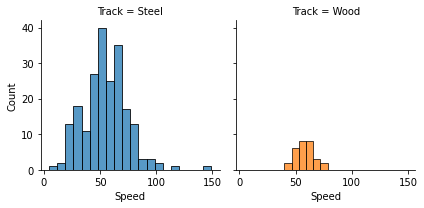

In [30]:
# Create faceted histogram with seaborn. 
g = sns.FacetGrid(data = coasters, col = "Track", hue = "Track")
g.map(sns.histplot, "Speed")
plt.show()

Awesome! Both populations seem to follow roughly normal distributions. We do have to be careful since there are some apparent outliers for steel roller coasters.

In [ ]:
# Store the counts in different variables. One for steel, one for wood and one for total
n_s = 
n_w = 
n = n_s + n_w

# Calculate the difference in average speed for wood and steel
avg_diff =  speed_wood - speed_steel

# Difference in standard errors
  # First calculate standard deviation for steel and wood separately 
sd_s = 
sd_w = 

  # Standard error. Refer to formula at the bottom.
se_s = sd_s ** 2 / 212
se_w = sd_w ** 2 / 29

# Difference of standard error. Refer to formula at the bottom.
se_diff = sqrt(se_s + se_w)

#### Standard Error Formula:

## $\sqrt{\frac{σ_1^2}{n_1} + \frac{σ_2^2}{n_2}}$ 

Great! Now that we have all these values we will go ahead and put them as parameters in the t.interval formula.

**Structure:**
* t.interval(loc = avg_diff, scale = se_diff, df = degrees_of_freedom, alpha = conf_value)

**Arguments:**
* loc = # ; difference between means
* scale = # ; standard erorr difference.
* df = # ; degrees of freedom (n1 + n2 - 2 if pooled data or use function degreesOfFreedom for non-pooled data)
* alpha = confidence interval from 0 to 1

In [32]:
def degreesOfFreedom(m_1, m_2, sd_1, sd_2, n_1, n_2):
    df = (((sd_1**2)/n_1 + (sd_2**2)/n_2)**2)/ (((sd_1**2)/n_1)**2/(n_1-1) + ((sd_2**2)/n_2)**2/(n_2-1))
    return df

In [33]:
degreesOfFreedom(speed_wood, speed_steel, sd_s, sd_w, n_s, n_w)

71.06074348199017

In [ ]:
# Store lower and upper boundaries.
lower, upper = t.interval(loc = , scale = , df = , alpha =)
print(lower, upper)

Since *zero is included in the confidence interval*, the true population of wood roller coasters could be either slower, faster or have the same speed as steel roller coasters, but we do not have enough evidence to determine which one of these alternatives is the right case.

## Paired sample t-test
Our next statistical inference task is to complete a paired sample t-test, or a dependent sample t-test, on our coasters dataset. Remind yourselves that a paired sample t-test checks if the mean difference between two observations of the same group is 0. These tests are particularly useful to determine the impact of a treatment in an experiment.

In this example, the data comes from Dr. Chico’s introductory statistics class. Students in the class take two tests over the course of the semester. Dr. Chico gives notoriously difficult exams with the intention of motivating her students to work hard in the class and thus learn as much as possible. Dr. Chico’s theory is that the first test will serve as a “wake up call” for her students, such that when they realize how difficult the class actually is they will be motivated to study harder and earn a higher grade on the second test than they got on the first test.

To determine if Dr. Chico's "wake up call" truly works for the true population, let's perform a paired sample t-test to determine whether or not a student's performance on the second exam is significantly different from their performance on the first exam.
+ $H_0$: The average scores for each test will be the same.
+ $H_A$: The average scores for each test are not the same.

Let's begin by importing the data and taking a look at its format.

In [35]:
# Import data 
Chico = pd.read_csv("chico_wide.csv")

# Glimpse data
Chico.tail()

,id,grade_test1,grade_test2
15,student16,58.7,60.1
16,student17,50.1,51.7
17,student18,64.2,65.6
18,student19,57.4,58.3
19,student20,57.1,60.1


Before we can begin our test, we will need to create two separate sets of data: one with the scores from the first exam and one with the scores from the second exam.

In [36]:
# Scores on the first exam
exam1 = Chico['grade_test1']

# Scores on the second exam
exam2 = Chico['grade_test2']

Recall that in a paired sample t-test, the conditions for inference are the paired data condition, independence, and normality. We know that the data satisfy the paired data condition because these two exam scores are dependent on a single student. Given that the data is paired, the groups are not independent, thus, here we are looking for pairwise differences. We can be certain that this data is independent because the observed differences are a representative sample from a population of interest. Additionally, one student's performance does not impact another student's performance on an exam. To check the normality condition, we can again produce our Q-Q plots to check.

In [ ]:
# Draw the Q-Q plot
probplot(exam1, plot = pyplot)

# Display the plot
plt.show()

In [ ]:
# Draw the Q-Q plot
probplot(exam2, plot = pyplot)

# Display the plot
plt.show()

Seeing as all of the datapoints roughly follow the line of best fit, we can assume that our data follows the normality condition. We will proceed to test our null hypothesis that Dr. Chico's theory produces no significant difference in students' performance.

In [ ]:
# Assign the results of our test to two variables
stat, p = ttest_rel(,)

# Display the results
print("p-values:", p)
print("t-test:", stat)

In [40]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


When alpha is equal to 0.05, we reject the null hypothesis that Dr. Chico's theory produces no significant difference in students' performance. Rather, it appears that students performed significantly better on the second exam, which may be a result of Dr. Chico making the first exam particularly challenging. Thus, Dr. Chico's could be applied to other student populations and produce and improvement in their scores as well.

## One-way ANOVA

In the case where we have two or multiple groups that we would like to compare at the same time, we will want to use ANOVA as our statistical inference test. ANOVA checks for a signficant difference between and within multiple groups, and it can test multiple hypotheses at once. 

In our example, we will analyze the backpack weight to body weight ratios of students in their first through third years of their undergraduate studies. 
+ $H_0$: There is no significant difference between the ratios of these year groups.
+ $H_A$: There is a significant difference between the ratios of these year groups.

Let's begin by familiarizing ourselves with the data.

In [41]:
# Import data 
bp = pd.read_csv("Backpack.csv")

# Glimpse the data
bp.head()

,BackpackWeight,BodyWeight,Ratio,BackProblems,Major,Year,Sex,Status,Units
0,9,125,0.072000,1,Bio,3,Female,U,13
1,8,180,0.044444,0,EE,2,Female,U,14
2,8,170,0.047059,0,CM,3,Male,U,15
3,8,135,0.059259,0,Bus,3,Female,U,15
4,12,125,0.096000,1,CS,3,Female,U,12


Let's check the conditions for inference for one-way ANOVA which are linearity, independence, equal variance, and normality. Our data satisfies the independence condition because one student's backpack to bodyweight ratio does not impact another student's ratio. We will produce a Normal Q-Q plot to check normality, and now we will also teach you how to create a Residuals vs. Fitted plot to check linearity and equal variance.

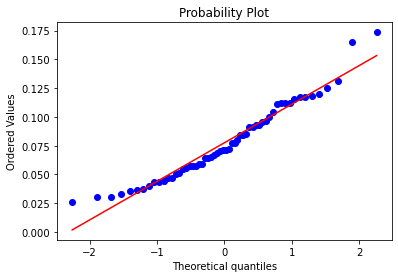

In [42]:
# Draw the Q-Q plot
probplot(bp["Ratio"], plot = pyplot)

# Display the figure
plt.show()

Based on the probability plot above, the data looks to be pretty normal with the exception of some slight deviation in the upper and lower tails. We will proceed to create the Residuals vs. Fitted plot with caution.

To produce the following plot, we will need to create the model for our one-way ANOVA. In this case, we will need to articulate to Python that we are trying to understand the relationship between backpack ratios and a student's year. After fitting the model, we will then need to direct Python to calculate the fitted and residual values. After that, we will be using matplotlib.pyplot to create a scatterplot of the residuals vs. fitted points.

When fitting a linear model, we will be using a new method called *ols( )* from the *statsmodels.formul.api* library. As good practice, we will assign the output to a variable. Within the parentheses, we must specify the following options:
+ data = our dataset
+ formula = "dependent_variable ~ explanatory_variable"
+ .fit() = function written after the parentheses that instructs Python to fit the model

In [ ]:
# Fitting linear model
anova_mod = 

# Fitted values that predict the backpack ratio
fitted = anova_mod.predict()

# Observed ratios - fitted values = residuals
# .resid finds the residuals
residuals = anova_mod.resid

# Residuals vs. fitted values
plt.scatter(fitted, residuals)

# Adds a line to more clearly see variance from 0
plt.axhline(y = 0, color = "black", linestyle = ":")

# Add labels
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs. Residuals")

# Display the graph
plt.show()

The fitted vs. residuals plot demonstrates that the conditions for linearity and equal variance are not satisifed by this dataset. The data points are showing clear patterns and do not fall around the zero line. For the sake of learning how to do ANOVA, we will continue without taking the results of the test to mean much.

Since our data is set-up and we have checked conditions, we can begin our one-way ANOVA test to see if backpack to bodyweight ratio changes depending on a student's year. We will generate a one-way ANOVA table using the function *stats.anova_lm* from the *statsmodels.api* library. As good practice, we will assign our table to a variable, and within the parentheses, specify the following options:
+ model = the model name assigned when we fit the model above
+ typ = the type of ANOVA test to perform, e.g. "1" for one-way ANOVA, "2" for two-way ANOVA, and so forth.

In [ ]:
# Create ANOVA table
anova_table = stats.anova_lm()

# Display the ANOVA table
print(anova_table)

Just now, we have tested the hypothesis that there is no difference between the mean backpack ratio for students of different years in their undergraduate studies. Our results show us that we fail to reject the null hypothesis at a significance level of 0.05, because the p-value for our F-statistic is 0.47. Meaning, there is no significant difference between the backpack to bodyweight ratios for students of different class years. However, given that our data fails the conditions for one-way ANOVA's inference, we should not take these results as fact and try again with a better dataset.

## Inference for Linear Regression
Let's learn how to perform inference with linear regression! We will use a dataset from the world health organization.

In [45]:
# Read data set
who = pd.read_csv("world_health.csv")

In [46]:
# Take a look at the data set
who.head()

,Country,Year,Status,life_exp,adult_mort,inf_deaths,alcohol,percentage_expenditure,hepatitisb,measles,...,polio,total_expenditure,diphteria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Is there an association between schooling and life expectancy after adjusting for relevant confounders?
* $H_0$: there's no association between schooling and life expectancy
* $H_A$: there's an association between schooling and life expectancy

To plot some of the graphs for checking conditions and asummptions, we must fit our data into our linear model. We will use ols which we imported at the beginning of the notebook.

**Arguments:**
* data = dataframe
* formula = "dependent ~ independent" 

After writing our arguments, we will type .fit()

**Structure:**
* ols(data = dataframe, formula = "dependent ~ independent").fit()

In [47]:
# Fit model
model1 = 

### Linearity
There are different ways of checking linearity. In order to put in practice what we've previously learned we will use a scatterplot to check if the relationship between life_exp and schooling is truly linear or not.

In [ ]:
# Create scatterplot using lmplot from seaborn.
sns.lmplot()

We can say that the scatterplot follows a moderately weak, positive linear associaiton.

### Independence and Equal Variance
To check independence and equal variance we will use a scatterplot. More specifically, we will plot the fitted and residual values.

* fitted = modelName.predict()
* residuals = modelName.resid()

**Structure:**
* plt.scatter(fitted, residuals)

In [49]:
# Use the fitted model to store fitted and residual values
fitted = 
residuals = 

In [ ]:
# Plot scatterplot using fitted and residual values
plt.scatter(fitted, residuals)

# Add horizontal line
plt.axhline(y=0, color="black", linestyle=":")

# Show plot
plt.show()

Awesome! we can see that the values seem to be randomly scattered around the 0 axis.

### Normality 
To check normality we will use qqplot, which we imported at the beginning.

**Structure:**
* qqplot(data = modelName.resid, line = "s");

Note that there's a semi-colon at the end, which is to avoid Jupyter from returning two plots.  

**Arguments:**
* data = modelName.resid 
* line = "s" ; standardized line

In [ ]:
# Plot the qqplot
qqplot();

# Show plot
plt.show()

The end and beginning of the line seem to fall out of the red line, so we will proceed with caution.
Great! our conditions have been satisfied. Let's look at the summary of the linear model.

* modelName.summary()

In [5]:
# Print summary
print(model1.summary())

Schooling has a positive association of 2.1, with a standard error of 0.034 , with a t-ratio of 60 which gives a p-value < 0.05, corresponding to a 95% confident interval for the beta coefficient between 2.035 and 2.172.

We can reject the null hypothesis, since we have enough evidence to say that there is a positive association between schooling and life expectancy.

## Multiple Linear Regression

Now, what if we consider a third variable?

* $H_0$ : there's no difference between country status and country's life expectancy, when adjusting for schooling
* $H_A$ : there's a difference between country status in country's life expectancy, when adjusting for schooling

First, we will fit the model. We added a second independent variable, status. As this variable is categorical, we must add a C before its name.

**Arguments:**
* data = dataframe
* formula = "dependent ~ independent" 

After writing our arguments, we will type .fit()

**Structure:**
* ols(data = dataframe, formula = "dependent ~ independent_one + C(independentCat_two)").fit()

In [53]:
# Fit the model
model2 = 

Now, let's check conditions. This is pretty much the same process we did before.

### Linearity

In [ ]:
# Plot lmplot with schooling and life_exp. We will add the parameter hue to see how it changes by status.
sns.lmplot()

# Show plot
plt.show()

Great! Both groups seem to follow a moderately weak, positive, linear association.

### Independence and Equal Variance

In [ ]:
# Create two grids: one for developing and one for developed. 
g = sns.FacetGrid(data = who, col = "Status", hue = "Status")

# Map the residual plots onto the grids.
g.map(sns.residplot, "schooling", "life_exp")

# Set labels.
g.axes[0,0].set_xlabel("residuals")
g.axes[0,1].set_xlabel("residuals")
g.axes[0,0].set_ylabel("fitted")

# Show plot
plt.show()

Awesome! Both graphs seem to be randomly scattered around the 0 axis.

### Normal Population
**Structure:**
* qqplot(data = modelName.resid, line = "s");

**Arguments:**
* data = modelName.resid 
* line = "s" ; standardized line

In [ ]:
# Graph qqplot by using model2.resid
qqplot();

# Show graph
plt.show()

As also seen in the simple linear regression example, the end and beginning of the line seem to fall out of the red line, so we will proceed with caution. Now, let's look at the summary

In [ ]:
# Show model2 summary
print(model2.summary())

Since the p-value < 0.05 we can reject the null hypothesis. Compared to developed countries, countries in development have a lower life expectancy average. In conclusion, there's an association between schooling and life expectency when considering both developed and in development countries.

Let's predict the life expectancy for a new country. Let's say that this country has an average of 12 years of schooling and it's a developed country.

In [58]:
# Get values from the table
intercept = 48.66
st_coef = -3
sc_coef = 1.93 
exp = intercept + sc_coef * 12 - 3 * 0

# Print results
print("The life expenctancy is: " , exp, " years.")

The life expenctancy is:  71.82  years.


We could also create a function to make this process easier and faster!

In [59]:
# Define function and specify our arguments (the values that change)
def life_expectancy(schooling , status):
    exp = 48.66 + 1.93 * schooling - 3 * status
    print("The life expectancy is: " , exp, " years.")

# Call function
life_expectancy(12, 0)

The life expectancy is:  71.82  years.


If we recall our scatterplot, we can see that the obtained value makes sense! 

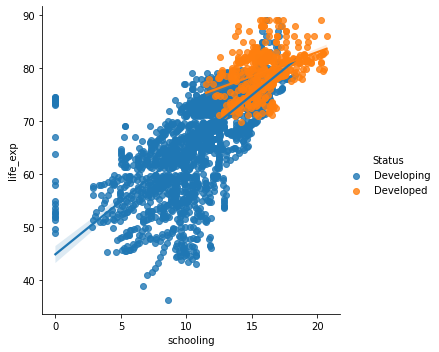

In [60]:
# Plot lmplot
sns.lmplot(data = who, x = "schooling", y = "life_exp", hue = "Status")
plt.show()

## Tips
* Fit the linear regression model first! You will need it to create some of the graphs.
* Assign models and variables to clear and concise names.
* Keep your code organized. 
* Don't forget to import functions and libraries!

## References
* https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html
* https://research.library.gsu.edu/c.php?g=844869&p=7657842
* https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704-ep713_multivariablemethods/bs704-ep713_multivariablemethods2.html
+ https://brendanhcullen.github.io/psy611/labs/lab-9.html#data
+ https://www.reneshbedre.com/blog/anova.html
+ Python Data Analysis - Third Edition. (2019) 2022. Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv.
+ Agresti, Alan, and Maria Kateri. 2021. Foundations of Statistics for Data Scientists: With R and Python. CRC Press.
+ De Veaux, Richard D., Paul F. Velleman, and David E. Bock. 2022. Intro Stats. Sixth Edition. Pearson Education, Inc.
+ “STAT 2: Modeling with Regression and ANOVA 2E | Student Resources.” n.d. Accessed July 22, 2022. https://www.macmillanlearning.com/studentresources/college/collegebridgepage/stat22e.html.
+ Sunel, Khuzema. 2020. “Statistical Inference in Python Using Pandas, NumPy — Part I.” Medium. August 11, 2020. https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe.
